In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Creacion de datos aleatorios normalizados

x =2* np.random.rand(100,1)
y= 4+3*x+np.random.randn(100,1)

print("shape x: {}, shape y: {}".format(x.shape,y.shape))

shape x: (100, 1), shape y: (100, 1)


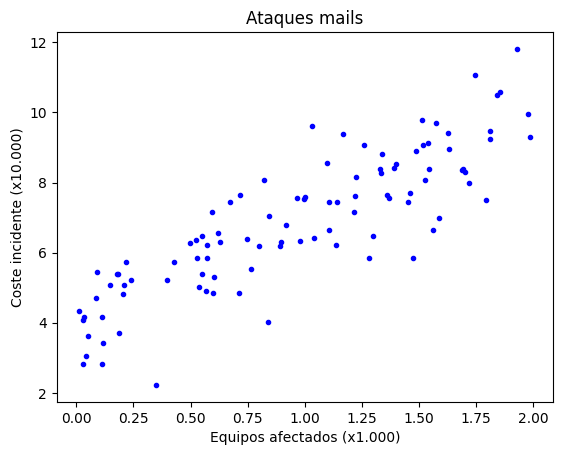

In [4]:
# Representación gráfica
plt.plot(x, y, "b.")
plt.xlabel("Equipos afectados (x1.000)")
plt.ylabel("Coste incidente (x10.000)")
plt.title("Ataques mails")
plt.show()

In [5]:
#Convertir a tabla y "aplanar en una sola dimension (columna)" en un mismo paso
df = pd.DataFrame({"nº_pc_afectados": x.flatten(), "coste": y.flatten()})
df

,nº_pc_afectados,coste
0,1.718224,7.989452
1,1.298496,6.461015
2,0.538258,5.010410
3,0.897020,6.304048
4,1.370236,7.560900
...,...,...
95,0.117057,3.433374
96,0.917087,6.789788
97,1.541550,9.117849
98,0.550608,5.391569


In [6]:
# Escalar valores en misma medida
df["nº_pc_afectados"] = df["nº_pc_afectados"]*1000
df["coste"] = df["coste"]*10000

df

,nº_pc_afectados,coste
0,1718.223820,79894.515513
1,1298.495960,64610.147038
2,538.257641,50104.097691
3,897.019569,63040.480834
4,1370.235513,75608.996130
...,...,...
95,117.057255,34333.744232
96,917.087383,67897.877981
97,1541.550189,91178.487588
98,550.608069,53915.694789


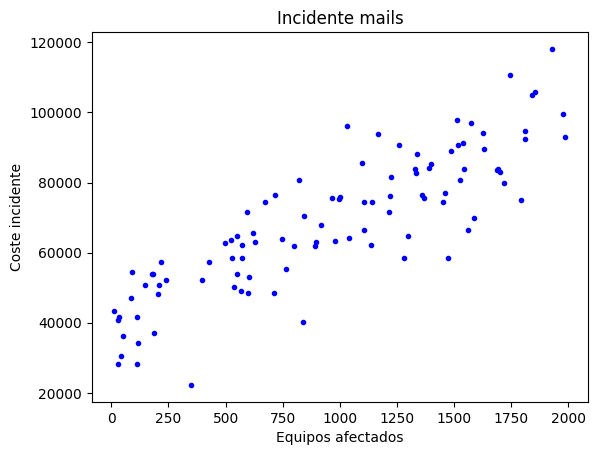

In [7]:
plt.plot(df["nº_pc_afectados"], df["coste"], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste incidente")
plt.title("Incidente mails")
plt.show()

In [8]:
df['nº_pc_afectados'].values.reshape(-1,1).shape

(100, 1)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# Guardamos el metodo en la variable 
lin_reg=LinearRegression()
lin_reg.fit(df['nº_pc_afectados'].values.reshape(-1,1), df["coste"].values)

LinearRegression()

In [11]:
# parametro alpha => y = a + bx, Corte en el eje y cuando x=0
lin_reg.intercept_

40322.29309265717

In [12]:
# parametro beta => y = a + bx, Multiplicador de la variable de entrada (valor de la pendiente)
lin_reg.coef_

array([29.52658677])

In [13]:
df["nº_pc_afectados"].max()

1987.73310554929

In [14]:
# Calculamos el rango de valores que toma el eje x
x_min_max = np.array([[df["nº_pc_afectados"].min()], [df["nº_pc_afectados"].max()]])
x_min_max

array([[  13.44845749],
       [1987.73310555]])

In [15]:
#Rango de valores que toma el eje y en función de x
y_train_pred = lin_reg.predict(x_min_max)
y_train_pred

array([40719.38013983, 99013.26711355])

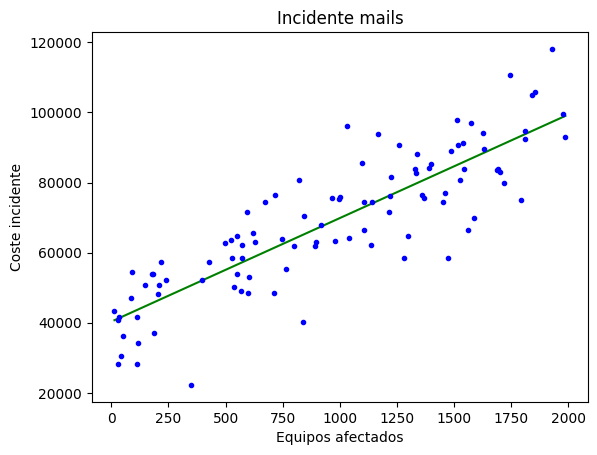

In [16]:
# Gráfica de ajuste de regresión lineal
plt.plot(x_min_max, y_train_pred, 'g-')
plt.plot(df["nº_pc_afectados"], df["coste"], 'b.')
plt.xlabel("Equipos afectados")
plt.ylabel("Coste incidente")
plt.title("Incidente mails")
plt.show()

In [17]:
# Añadimos un nuevo valor para probar el modelo
x_new= np.array([[1300]])

y_new = lin_reg.predict(x_new)
y_new

array([78706.85589646])

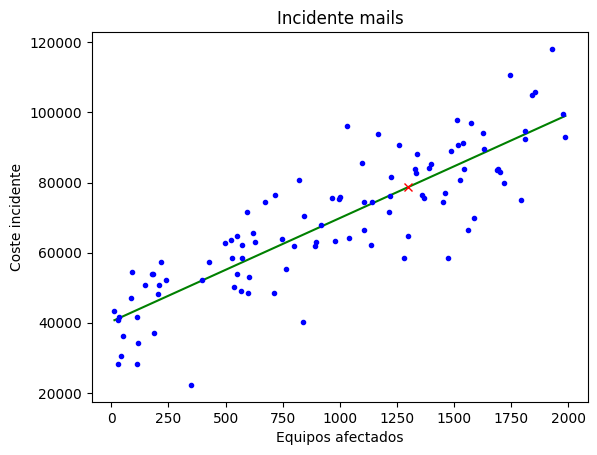

In [18]:
# Representación con el nuevo valor de entrada
plt.plot(x_min_max, y_train_pred, 'g-')
plt.plot(df["nº_pc_afectados"], df["coste"], 'b.')
plt.plot(x_new, y_new, 'rx')
plt.xlabel("Equipos afectados")
plt.ylabel("Coste incidente")
plt.title("Incidente mails")
plt.show()

In [19]:
# El modelo predice que la variable de salida "y" tomaría el valor 78.706:
y_new

array([78706.85589646])